# Simple IFU observation

In [1]:
import scopesim as sim
from astropy import units as u
from matplotlib import pyplot as plt

In [2]:
cmd = sim.UserCommands(
    use_instrument="METIS",
    set_modes=['lms'],
    properties={
        "!OBS.wavelen": 3.555,

        # These !SIM.spectral_* properties make the simulation faster, but less precise.
        # Comment them out for your final simulations.
        # "!SIM.spectral_bin_width": 1e-3,
        # "!SIM.spectral_resolution": 1000,
       
    })

lms = sim.OpticalTrain(cmd)
src = sim.source.source_templates.star(flux=0.01 * u.Jy, x=0, y=0)

In [3]:
lms.observe(src, update=True)

 FOV effects:  50%|██████████████████████████████████▌                                  | 1/2 [04:32<04:32, 272.19s/it]

astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 1
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 2
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 3
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 4
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 5
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 6
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 7
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 8
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 9
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 10
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 11
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 12
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 13
astar.scopesim.effects.spectral_trace_list_utils - Mapping Slice 14
astar.scopesim.effects.spectral_trace_list_utils - Mappin


 FOVs: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [07:28<00:00, 448.95s/it]
 Image Plane effects: 0it [00:00, ?it/s]


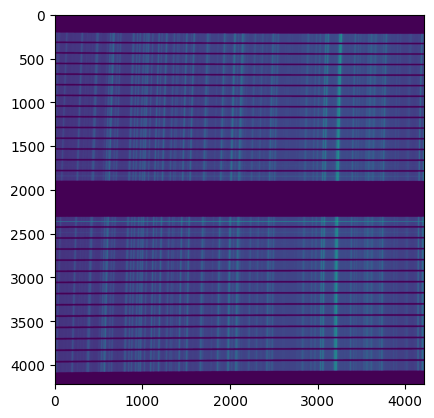

In [4]:
ip = lms.image_planes[0]

plt.imshow(ip.data)

In [5]:
hdul = lms.readout(exptime=3600.)[0]

astar.scopesim.effects.electronic - WARNING: DIT = 1.000 s < MINDIT = 1.300 s
astar.scopesim.detector.detector_array - Extracting from 4 detectors...
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 1963534 negative pixels
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 1980215 negative pixels
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 1985481 negative pixels
astar.scopesim.effects.electronic - WARNING: Effect Quantization: 1971436 negative pixels
astar.scopesim.effects.electronic - WARNING: DIT = 1.000 s < MINDIT = 1.300 s


In [6]:
len(hdul)

5

In [7]:
data_raw = hdul[1].data

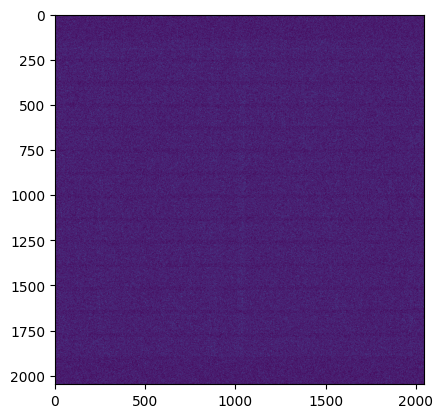

In [8]:
plt.imshow(data_raw)

In [9]:
rectified = lms["lms_spectral_traces"].rectify_cube(hdul)

astar.scopesim.effects.metis_lms_trace_list - Computing interpolation functions
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 1
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 2
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 3
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 4
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 

In [10]:
rectified.data.shape

(5517, 28, 110)

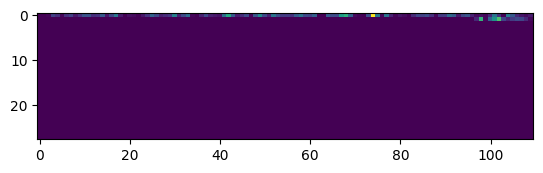

In [11]:
plt.imshow(rectified.data[3,:,:])

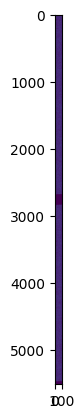

In [12]:
plt.imshow(rectified.data[:,3,:])

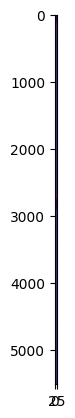

In [13]:
plt.imshow(rectified.data[:,:,3])